# 다차원 텐서 (다차원 배열)

In [1]:
import numpy as np

### 다차원 배열의 계산 복습

In [8]:
A = np.array([[1, 2, 3], 
              [4, 5, 6]])
B = np.array([[7, 8, 9], 
              [10, 11, 12]])

add_result = A + B

vec = np.array([1, 2, 3])
add_result2 = A + vec   # 브로드캐스팅

print(add_result)
print(add_result2)

dot_result = A.dot(B.T)
print(dot_result)

[[ 8 10 12]
 [14 16 18]]
[[2 4 6]
 [5 7 9]]
[[ 50  68]
 [122 167]]


- 🔍 그럼 브로드캐스팅이 뭐냐?
- 크기가 다른 배열끼리 연산할 때, 작은 배열의 크기를 자동으로 맞춰주는 기능이야!

In [2]:
X = np.random.randn(4, 5)
print(X)

[[-0.20323982 -1.65338909 -1.50221518 -0.50136175 -1.35089974]
 [-0.46407368 -1.89746486 -0.46565874  0.71003518  0.96446742]
 [ 1.06027867  0.45328783  1.30627228 -1.0619815   0.75009166]
 [ 0.80361683  1.0962106   0.17973506  0.58009409 -0.35523172]]


In [3]:
W = np.random.randn(5, 3)
print(W)

[[ 0.60534907  0.51721795  0.62297877]
 [-0.65685247  0.74605925  1.45244521]
 [ 0.27509228  0.01890965 -0.04940135]
 [ 0.13639269  0.52743755 -1.02631597]
 [-1.28520217 -1.01007602 -0.20916647]]


In [4]:
b = np.random.randn(1, 3)
print(b)

[[-1.45215741 -0.75852444 -0.05659538]]


### 다차원 배열의 계산으로 순전파 구현

- 🧠 먼저 용어 정리부터!
- ✅ 순전파 (Forward Propagation)란?
- 입력 데이터를 신경망을 통과시켜서 출력값을 계산하는 과정이야.

- "입력 X → 가중치 W → 편향 b → 활성화 함수 → 출력" 순서로 계산

- 이걸 순방향으로 흐른다 해서 "순전파"라고 불러

In [5]:
# 입력 데이터
X = np.random.randn(4, 5)   # 4개의 샘플, 5차원 feature
# 총 4개의 샘플, 각각 5개의 특성(feature)
# np.random.randn은 평균 0, 표준편차 1인 정규분포 이자, 대부분 -3~3 사이값.

# 가중치
W = np.random.randn(5, 3)   # 5개의 입력(feature), 3개의 뉴런으로 구성된 레이어
# W는 가중치 행렬이야
# shape: (5, 3) → 입력 5개를 받아서 출력 3개(즉, 뉴런 3개)로 연결됨


# 편향
b = np.random.randn(1, 3) # 편향 (뉴런 3개용)
# b는 편향 → shape: (1, 3)
# 각 뉴런마다 하나씩 있어서 총 3개

# 선형 계산 (W*X + b), 순전파의 핵심 
z = np.dot(X, W) + b

# ReLU 활성화 함수
result = np.maximum(0, z) # z의 값이 0보다 작으면 0으로 바꿈, 0보다 크면 그대로 유지 → 음수 제거하는 역할

print(result)

[[0.         0.         0.        ]
 [0.         0.         0.        ]
 [2.13460171 1.79390224 7.34915892]
 [0.         0.         4.5441835 ]]


### 다층 퍼셉트론

### 그전에... 
- ✅ 1. 은닉층(Hidden Layer)란?
- 입력층과 출력층 사이에 있는 모든 층을 "은닉층(hidden layer)"이라고 불러.

In [6]:
# 입력층 : 데이터를 받아들이는 층 (여기선 X, shape (6, 10))
X = np.random.randn(6, 10)

# 은닉층 : 10개의 입력 -> 8개의 뉴런
w1 = np.random.randn(10, 8) 
b1 = np.random.randn(1, 8)

# 출력층 : 8개의 입력 -> 4개의 클래스
w2 = np.random.randn(8, 4) 
b2 = np.random.randn(1, 4)

# 은닉층 계산 (선형 계산 + tanh 활성화 함수)
z1 = np.dot(X, w1) + b1
result1 = np.tanh(z1)

# 출력층 계산 (선형 계산 + softmax 활성화 함수)
z2 = np.dot(result1, w2) + b2
exp_z = np.exp(z2 - np.max(z2, axis=1, keepdims=True))
result2 = exp_z / np.sum(exp_z, axis=1, keepdims=True)

print(result2)

[[2.87014311e-03 8.24557210e-01 8.28357659e-02 8.97368805e-02]
 [5.18264469e-01 1.17997106e-04 1.19211119e-05 4.81605613e-01]
 [5.86950424e-01 1.50279085e-02 1.21031833e-04 3.97900636e-01]
 [8.26072095e-02 5.33972374e-02 4.37848877e-03 8.59617064e-01]
 [2.67251468e-02 1.25437078e-02 2.21256190e-01 7.39474955e-01]
 [1.67067564e-01 1.07011356e-01 3.15708590e-03 7.22763995e-01]]


✅ 2. 그럼 tanh는 왜 쓴 걸까?
🤔 활성화 함수는 비선형성 추가 + 학습 안정성 확보 목적이 있어.

🔎 tanh의 특징:
- 항목/	설명
- 출력 범위/	-1 ~ 1
- 중간값/	0 기준 → 양수/음수 균형 잡힘
- 효과/	데이터 분포를 중앙으로 몰아줌 (zero-centered) → 학습 안정성 ↑
- 🔍 왜 tanh를 사용했을까?
- 입력값이 정규분포 기반 (np.random.randn) 이니까, 값이 0 근처에 많이 몰려 있음

- 이런 입력을 tanh에 넣으면 출력이 고르게 퍼짐

- 그리고 중간값이 0이기 때문에 Gradient Descent 학습에 좋음

- 일반적으로 은닉층에서는 tanh나 ReLU 중 하나를 사용하는데,
- ReLU는 음수 다 버려서 sparse하게 만들고, tanh는 음수~양수 정보를 살림

- ✔️ 그래서 첫 은닉층에서 tanh를 쓴 건 학습 안정성과 표현력 확보 목적이야.



### 이미지 데이터 예시
- 🎨 전체 목적
- 3채널(RGB) 이미지 데이터를 만들고
- 그것을 원본 / 밝게 / 흑백으로 바꿔서
- 한 화면에 3개 이미지로 시각화하는 코드야.

(np.float64(-0.5), np.float64(31.5), np.float64(31.5), np.float64(-0.5))

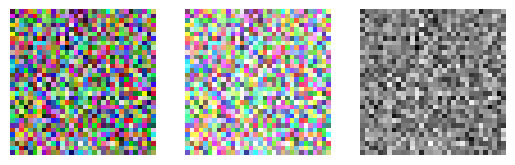

In [7]:
import matplotlib.pyplot as plt

# 이미지 생성
batch_size = 5 # 이미지 5장 생성 
channels = 3 # RGB
height = 32
width = 32

images = np.random.rand(batch_size, channels, height, width)

bright_images = np.clip(images + 0.2, 0, 1) # 모든 픽셀 값에 +0.2 해서 더 밝게 만듦. 다만 이미지 픽셀은 0~1 사이 값이어야 하니까, np.clip()을 써서 값이 1을 넘으면 1로 자름
    
gray_images = np.mean(images, axis=1) # axis=1 → 채널 방향 (R, G, B)을 평균냄, → 즉, (3채널)을 1채널로 줄여서 흑백으로 만드는 거야

# PyTorch 프레임워크에서는 이미지 데이터를 (채널, 높이, 너비) 순서로 저장
# matplotlib.pyplot.imshow()는 (높이, 너비, 채널) 순서로 기대
# 따라서 transpose()를 이용해 축의 순서를 재배열
images_for_display = images[0].transpose(1, 2, 0) # matplotlib.pyplot.imshow()는 이미지를 (높이, 너비, 채널) 순서로 받아야 해
bright_images_display = bright_images[0].transpose(1, 2, 0) # transpose(1, 2, 0) → (32, 32, 3)으로 바꿔줘야 이미지로 제대로 보임

plt.subplot(1, 3, 1)
plt.imshow(images_for_display)
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(bright_images_display)
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(gray_images[0], cmap='gray')
plt.axis('off')

- "모든 픽셀 값에 +0.2 해서 더 밝게 만듦. 다만 이미지 픽셀은 0~1 사이 값이어야 하니까, np.clip()을 써서 값이 1을 넘으면 1로 자름" 이라고 했는데 의아한 것은 이미지 픽셀은 0~255인데 0~1 사이의 값이라고 한 이유는  픽셀 값이 0255냐, 01이냐는 **"데이터 타입과 처리 목적"**에 따라 다르기 때문. 딥러닝/머신러닝에서는 모델에 넣기 전에 보통 0~1 사이로 정규화(normalization)하는데 이 이유는 계산이 안정적이고, 경사하강법 같은 최적화가 잘 되기 때문, 즉 이 코드에서의 mages = np.random.rand(...) 는 0~1 사이의 실수값을 랜덤으로 뽑아정규화된 이미지를 흉내 내는 코드임. 

- np.clip()란? np.clip(arr, min_val, max_val) 넘파이 배열에서 값의 범위를 제한해주는 함수. arr의 값이 min_val보다 작으면 → min_val로 바꾸고, max_val보다 크면 → max_val로 바꾸는 거야, 중간값은 그대로 유지